#### Maestría en Inteligencia de Negocios y Análisis de Datos
#### Cuarto Ciclo, Abril 2023
#### Laboratorio #2 – AutoML con PyCaret
#### Marvin Chávez 08105031


In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
from pycaret.regression import *


C:\Users\DAVID\AppData\Local\Temp\ipykernel_9796\3193725743.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


#### 1. Carga de Datos.

In [2]:
# Cargar datos 
data = pd.read_csv('train.csv')
print(data.head())


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

#### 2. Realice un Split de los datos en 80% training y 20% testing. 

In [4]:
# Calcular el número de filas para el conjunto de entrenamiento del 80%
num_filas_train = int(len(data) * 0.8)

# Crear el conjunto de entrenamiento mediante muestreo aleatorio
data_train = data.sample(n=num_filas_train, random_state=2023)

# Crear el conjunto de prueba excluyendo las filas del conjunto de entrenamiento
data_test = data.drop(data_train.index)

# Visualizar las primeras filas de los conjuntos de entrenamiento y prueba para confirmar
print(f"Número de filas en el conjunto de entrenamiento: {len(data_train)}")
print(f"Número de filas en el conjunto de prueba: {len(data_test)}")


Número de filas en el conjunto de entrenamiento: 1168
Número de filas en el conjunto de prueba: 292


#### 3. EDA y Profiling de los datos

In [5]:
# Generar el reporte de profiling
profile = ProfileReport(data_train, title='Profiling Report', explorative=True)

# Mostrar el reporte en el notebook
#profile.to_notebook_iframe()

In [6]:
profile.to_file("Profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### 4. Descripción de los warnings generados en el EDA.

#####     Alta Correlación:
##### Varias variables muestran una alta correlación con otras, indicando posible redundancia. Ejemplos incluyen 1stFlrSF correlacionada con GarageArea y otras, 2ndFlrSF correlacionada con BedroomAbvGr y otras, 3SsnPorch correlacionada con Alley y otra, Alley correlacionada con 3SsnPorch y otras, BedroomAbvGr correlacionada con 2ndFlrSF y otras, y así con las demás variables mencionadas.

##### Desbalance de Clases:
##### Algunas variables presentan desbalance significativo en sus categorías, afectando potencialmente el aprendizaje del modelo. Ejemplos incluyen MSZoning, Street, LandContour, Utilities, LandSlope, Condition1, Condition2, BldgType, RoofStyle, RoofMatl, ExterCond, BsmtCond, BsmtFinType2, Heating, CentralAir, Electrical, BsmtHalfBath, KitchenAbvGr, Functional, GarageQual, GarageCond, PavedDrive, MiscFeature, SaleType, SaleCondition.

##### Valores Faltantes:
##### Varios campos tienen un número significativo de valores faltantes. Ejemplos clave incluyen LotFrontage, Alley, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, MiscFeature.

##### Valores Únicos:
##### Id tiene valores únicos, lo cual es común para un identificador y generalmente no contribuye al valor predictivo.

##### Gran Cantidad de Ceros:
##### Algunas variables tienen una alta proporción de ceros. Ejemplos son MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 2ndFlrSF, LowQualFinSF, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal.

#### 5. Setup

In [58]:

#lista completa de características numéricas y categóricas
numeric_features = [
    'OverallCond', 'BsmtFullBath', 'BedroomAbvGr', 'TotRmsAbvGrd',
    'Fireplaces', 'GarageCars', 'GarageArea', 'MoSold', 'YrSold'
]

categorical_features = [
    'LotShape', 'LandContour', 'LotConfig', 'Condition1', 'HouseStyle',
    'Exterior1st', 'ExterCond', 'Foundation', 'KitchenQual', 'SaleType', 'SaleCondition'
]

ignore_columns = [
    '1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 
    'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1', 'BsmtFinType2', 'BsmtHalfBath', 'BsmtQual', 
    'BsmtUnfSF', 'CentralAir', 'Condition2', 'Electrical', 'EnclosedPorch', 'ExterQual', 
    'Exterior2nd', 'Fence', 'FireplaceQu', 'FullBath', 'Functional', 'GarageCond', 
    'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 
    'Heating', 'HeatingQC', 'Id', 'KitchenAbvGr', 'LandSlope', 'LotArea', 'LotFrontage', 
    'LowQualFinSF', 'MSSubClass', 'MSZoning', 'MasVnrArea', 'MasVnrType', 'MiscFeature', 
    'MiscVal', 'Neighborhood', 'OpenPorchSF', 'OverallQual', 'PavedDrive', 'PoolArea', 
    'PoolQC', 'RoofMatl', 'RoofStyle', 'ScreenPorch', 'Street', 'TotalBsmtSF', 
    'Utilities', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd'
]

# Configuración del entorno de PyCaret
setup_config = setup(data=data_train,
                     target='SalePrice',  # Variable Objetivo
                     session_id=2023,
                     normalize=True,
                     normalize_method='minmax',
                     transformation=True,
                     transform_target=True,
                     numeric_imputation='mean',
                     categorical_imputation='mode',
                     numeric_features=numeric_features,  # Especificamos las características numéricas
                     categorical_features=categorical_features,  # Especificamos las características categóricas
                     #remove_outliers=True,
                     #outliers_threshold=0.05,  # Umbral para eliminar
                     ignore_features=ignore_columns  # Ignoramos las columnas especificadas
                    )


,Description,Value
0,Session id,2023
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(1168, 81)"
4,Transformed data shape,"(1168, 81)"
5,Transformed train set shape,"(817, 81)"
6,Transformed test set shape,"(351, 81)"
7,Ignore features,60
8,Numeric features,9
9,Categorical features,11


In [59]:
setup_config.X_train_transformed

,LotShape_IR1,LotShape_Reg,LotShape_IR2,LotShape_IR3,LandContour_Lvl,LandContour_Bnk,LandContour_HLS,LandContour_Low,LotConfig_CulDSac,LotConfig_Inside,...,SaleType_ConLI,SaleType_Oth,SaleType_ConLw,SaleType_Con,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Abnorml,SaleCondition_AdjLand
28,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
404,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1273,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
103,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
560,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
693,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
374,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
40,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#### 6. Entrenamiento y selección de modelos automática

In [60]:
best = compare_models(sort='RMSE') #, exclude=['lar','lr']

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,23:08:28
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,25292.6119,1522622807.8510,38318.9479,0.7402,0.1917,0.1429,0.3660
br,Bayesian Ridge,26186.5249,1541513552.3685,38565.1055,0.7414,0.1874,0.1459,0.3400
ridge,Ridge Regression,26263.0916,1551308992.5344,38666.6443,0.7396,0.1880,0.1464,0.2730
lightgbm,Light Gradient Boosting Machine,25997.0720,1548517095.7661,38832.8404,0.7343,0.1901,0.1457,0.4490
rf,Random Forest Regressor,25835.5933,1564365364.7746,38960.2150,0.7318,0.1943,0.1453,0.6050
huber,Huber Regressor,27351.9270,1664570608.5109,40105.2895,0.7237,0.2077,0.1534,0.3190
omp,Orthogonal Matching Pursuit,28748.8189,1739054065.1091,41205.6534,0.7047,0.2112,0.1647,0.2720
et,Extra Trees Regressor,27923.9522,1843597496.1417,42243.9754,0.6801,0.2081,0.1573,0.5530
ada,AdaBoost Regressor,31176.3619,2135720880.5001,45643.7487,0.6399,0.2268,0.1750,0.3590
par,Passive Aggressive Regressor,36225.7112,2488102797.8258,49356.5234,0.5848,0.2496,0.2041,0.2920


##### Los siguientes modelos se destacan como los tres principales según el coeficiente de determinación (R2), que es una medida estándar de la cantidad de varianza en la variable dependiente que es predecible a partir de las variables independientes.

##### Bayesian Ridge:
##### Este modelo ha demostrado ser el más competente en términos de R2, lo que indica que ha capturado una proporción sustancial de la variabilidad en la variable objetivo SalePrice. Con un MAE y RMSE relativamente bajos, el modelo proporciona estimaciones cercanas a los valores reales con un promedio de error moderado. El RMSLE y MAPE más bajos sugieren una buena precisión en la predicción en términos relativos y logarítmicos. El tiempo de entrenamiento es razonablemente corto, lo que indica una eficiencia computacional aceptable.

##### Ridge Regression:
##### El modelo de Ridge Regression sigue de cerca al Bayesian Ridge en términos de R2, lo que implica que también realiza una buena predicción de la varianza de SalePrice. Las métricas de error, incluyendo MAE, MSE y RMSE, son comparables a las del Bayesian Ridge, lo que sugiere que ambos modelos tienen un rendimiento similar en términos de error.

##### Gradient Boosting Regressor:
#####  Aunque con un R2 ligeramente menor, el Gradient Boosting Regressor sigue siendo un modelo robusto con una buena capacidad para explicar la varianza de la variable objetivo. Presenta el MAE más bajo entre los tres modelos, lo que indica que en promedio, sus predicciones están más cercanas al valor real. A pesar de tener un tiempo de entrenamiento un poco más largo, este modelo puede ser preferible dependiendo de la importancia relativa de las diferentes métricas para el proyecto.

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:30:23
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Bayesian Ridge


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,30784.8657,2425053008.7284,49244.8272,0.5228,0.2413,0.1872
1,25606.6913,1532229098.3856,39143.6981,0.8023,0.1737,0.1323
2,29831.2393,2655292271.6710,51529.5282,0.6962,0.1918,0.1413
3,25147.9710,1163299278.1422,34107.1734,0.7869,0.1946,0.1482
4,20420.0927,868476344.5358,29469.9227,0.8306,0.1360,0.1043
5,23190.1061,1016400641.9171,31881.0389,0.7803,0.1848,0.1530
6,22689.1716,1021282383.6499,31957.5090,0.8203,0.1574,0.1207
7,22774.1239,1050727234.9539,32414.9230,0.8159,0.1873,0.1452
8,28233.5894,1315582171.5118,36270.9549,0.7677,0.1905,0.1534


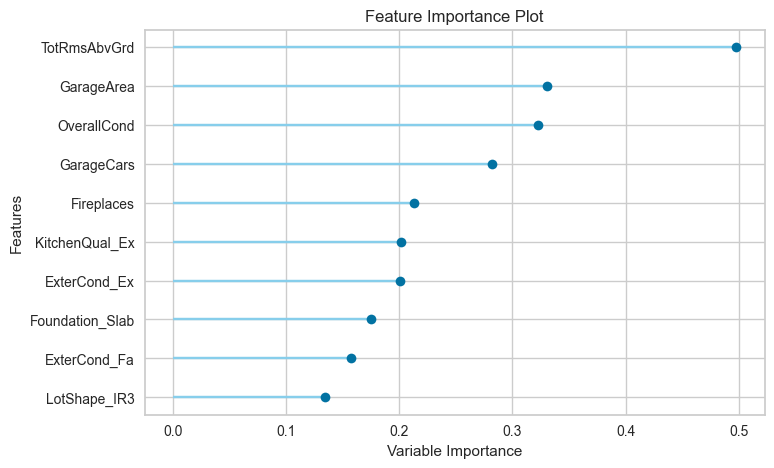

In [30]:

bayesian_ridge = create_model('br')
plot_model(bayesian_ridge, plot='feature')





##### Bayesian Ridge:    
##### La característica más influyente es TotRmsAbvGrd, lo que implica que el número total de habitaciones por encima del suelo es un fuerte predictor del precio de venta.    GarageArea y OverallCond también son importantes, lo que indica que el tamaño del garaje y la condición general de la vivienda juegan roles significativos en la determinación del precio.    Las características relacionadas con la calidad, como KitchenQual_Ex (calidad excelente de la cocina) y ExterCond_Ex (excelente condición exterior), demuestran ser predictores relevantes, aunque en menor medida.

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,30790.8012,2439463151.4703,49390.9218,0.5199,0.2412,0.1874
1,25747.9213,1538175127.6150,39219.5758,0.8016,0.1758,0.1337
2,29848.7196,2650269690.5425,51480.7701,0.6967,0.1920,0.1418
3,25263.9245,1166417215.2322,34152.8508,0.7863,0.1963,0.1496
4,20509.4703,864367292.4982,29400.1240,0.8314,0.1361,0.1050
5,23136.8910,1007854018.7947,31746.7167,0.7822,0.1842,0.1526
6,22778.5452,1022231711.8759,31972.3586,0.8202,0.1575,0.1210
7,22878.2966,1053567161.7144,32458.6993,0.8154,0.1871,0.1452
8,28159.2576,1330275415.4704,36472.9409,0.7651,0.1903,0.1524


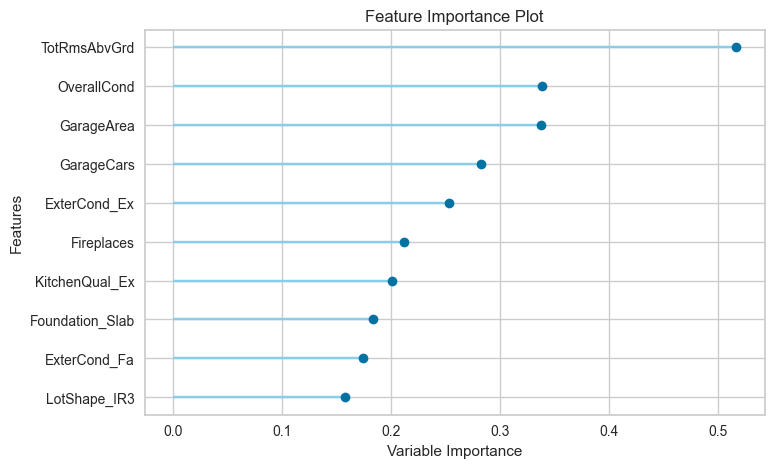

In [31]:
ridge = create_model('ridge')
plot_model(ridge, plot='feature')



##### Ridge Regression:    
##### Similar al modelo Bayesian Ridge, TotRmsAbvGrd y GarageArea son las características más importantes, con OverallCond y GarageCars siguiéndoles de cerca. La presencia de Fireplaces (chimeneas) como una característica con una importancia moderada sugiere que las comodidades de la vivienda pueden afectar su precio de venta.

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,32927.3733,3052865431.6936,55252.7414,0.3992,0.2697,0.2030
1,22590.3007,1121943617.0506,33495.4268,0.8553,0.1474,0.1173
2,28741.5985,2435512300.5069,49350.9098,0.7213,0.1907,0.1385
3,23207.4191,1203101000.2949,34685.7464,0.7796,0.2032,0.1352
4,23451.3946,1375359770.2666,37085.8433,0.7318,0.1599,0.1146
5,22408.3262,1086957601.7839,32969.0400,0.7651,0.1961,0.1524
6,23533.4290,1149917078.3363,33910.4273,0.7977,0.1744,0.1288
7,18789.7912,686175690.6182,26194.9554,0.8797,0.1782,0.1304
8,25854.0192,1174244378.4315,34267.2494,0.7926,0.1874,0.1420


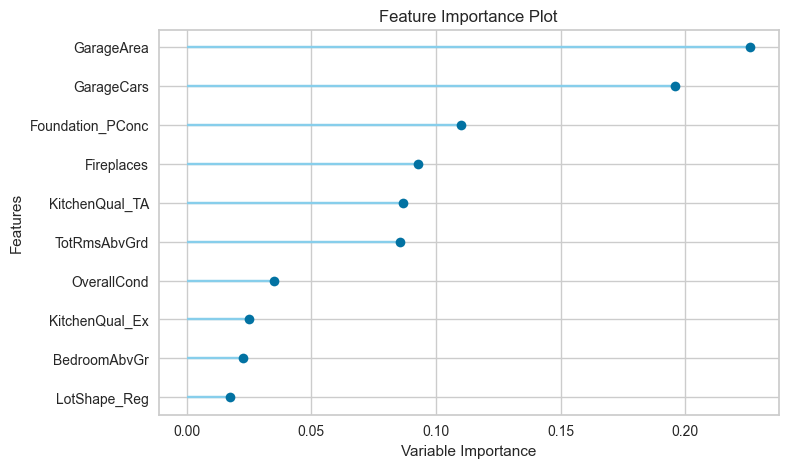

In [32]:
gbr = create_model('gbr')
plot_model(gbr, plot='feature')

##### Gradient Boosting Regressor:
#####     GarageArea aparece como la característica más importante, lo que sugiere que el tamaño del garaje es un predictor principal del precio de venta en este modelo. Otras características como GarageCars y Foundation_PConc (fundación de concreto vertido) también son importantes, lo cual puede reflejar preferencias en el mercado inmobiliario o asociaciones con otras características de calidad de la vivienda. KitchenQual_TA (calidad típica/ promedio de la cocina) muestra que no solo las calidades extremas (como 'Excelente') son importantes, sino también las clasificaciones promedio.

#### 7. Optimización de hiper-parámetros

In [61]:
print(best)

GradientBoostingRegressor(random_state=2023)


In [62]:
tuned_best =tune_model(estimator=best)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,23:10:49
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Gradient Boosting Regressor


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,30553.2066,2351185704.7776,48489.0266,0.5373,0.2515,0.1858
1,22796.5625,1428085160.4754,37790.0140,0.8158,0.1556,0.1186
2,29214.1131,2602305838.9872,51012.8007,0.7022,0.1885,0.1396
3,23535.7079,1074935251.1347,32786.2052,0.8030,0.1829,0.1351
4,28358.8516,1797230706.8889,42393.7579,0.6495,0.1865,0.1357
5,23907.6763,1252484895.1202,35390.4633,0.7293,0.2246,0.1737
6,22158.1083,955855538.3787,30916.9135,0.8318,0.1692,0.1329
7,18909.6493,778416138.6399,27900.1100,0.8636,0.1732,0.1249
8,26110.2819,1258570793.2452,35476.3413,0.7777,0.1901,0.1469


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [35]:
tuned_ridge = tune_model(ridge)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,30783.2756,2424607221.9172,49240.3008,0.5229,0.2416,0.1872
1,25541.5228,1535809913.6963,39189.4107,0.8019,0.1715,0.1314
2,29827.3190,2663966198.8432,51613.6242,0.6952,0.1917,0.1409
3,25035.8241,1162810836.4568,34100.0123,0.7869,0.1927,0.1467
4,20362.7588,873790538.8923,29559.9482,0.8296,0.1362,0.1039
5,23257.1936,1025507632.0444,32023.5481,0.7784,0.1856,0.1536
6,22634.9536,1024597840.8958,32009.3399,0.8197,0.1577,0.1205
7,22732.5092,1054427742.3193,32471.9532,0.8152,0.1879,0.1456
8,28285.7412,1309096482.7516,36181.4384,0.7688,0.1909,0.1542


Fitting 10 folds for each of 10 candidates, totalling 100 fits


#### 8. Selección del modelo final

In [63]:
print(best)



GradientBoostingRegressor(random_state=2023)


In [65]:
final_model = finalize_model(estimator=best)

#### 9. Almacenamiento del pipeline en el disco duro

In [66]:
save_model(model=final_model, model_name='../models/lab2')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('target_transformation',
                  TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=PowerTransformer(standardize=False)))),
                 ('numerical_imputer',
                  TransformerWrapper(include=['OverallCond', 'BsmtFullBath',
                                              'BedroomAbvGr', 'TotRmsAbvGrd',
                                              'Fireplaces', 'GarageCars',
                                              'GarageArea', 'MoSold', 'YrSold'],
                                     trans...
                                                                     'HouseStyle',
                                                                     'Exterior1st',
                                                                     'ExterCond',
                                                                     'Foundation',
                                                              

#### 10. Predicciones

In [68]:
model = load_model('../models/lab2')

Transformation Pipeline and Model Successfully Loaded


In [69]:
model

Pipeline(memory=FastMemory(location=C:\Users\DAVID\AppData\Local\Temp\joblib),
         steps=[('target_transformation',
                 TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=PowerTransformer(standardize=False)))),
                ('numerical_imputer',
                 TransformerWrapper(include=['OverallCond', 'BsmtFullBath',
                                             'BedroomAbvGr', 'TotRmsAbvGrd',
                                             'Fireplaces', 'GarageCar...
                                                                    'HouseStyle',
                                                                    'Exterior1st',
                                                                    'ExterCond',
                                                                    'Foundation',
                                                                    'KitchenQual',
                                                                    'SaleType',
                                                                    'SaleCondition'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('transformation',
                 TransformerWrapper(transformer=PowerTransformer(standardize=False))),
                ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                ('actual_estimator',
                 GradientBoostingRegressor(random_state=2023))])

In [70]:
predicciones = predict_model(model, data=data_test)
predicciones

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,21745.8781,994981171.1716,31543.3221,0.8327,0.1706,0.1316


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,prediction_label
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,151647.112794
21,22,45,RM,57.0,7449,Pave,Grvl,Reg,Bnk,AllPub,...,NaN,GdPrv,NaN,0,6,2007,WD,Normal,139400,154882.708207
27,28,20,RL,98.0,11478,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2010,WD,Normal,306000,278833.026455
29,30,30,RM,60.0,6324,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2008,WD,Normal,68500,90236.570857
31,32,20,RL,NaN,8544,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,NaN,0,6,2008,WD,Normal,149350,130706.751656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,1448,60,RL,80.0,10000,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2007,WD,Normal,240000,231024.036606
1449,1450,180,RM,21.0,1533,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2006,WD,Abnorml,92000,78499.612096
1451,1452,20,RL,78.0,9262,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2009,New,Partial,287090,341733.368790
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,170992.380156


#### 11. Cálculo de métricas de rendimiento

In [72]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error


# Calcula R2
r2_metric = r2_score(predicciones['SalePrice'], predicciones['prediction_label'])

# Calcula RMSE
rmse_metric = mean_squared_error(predicciones['SalePrice'], predicciones['prediction_label'], squared=False)

# Calcula MSE
mse_metric = mean_squared_error(predicciones['SalePrice'], predicciones['prediction_label'])

# Calcula MAPE
mape_metric = mean_absolute_percentage_error(predicciones['SalePrice'], predicciones['prediction_label'])

# Imprimir los resultados
print(f'R2: {r2_metric}')
print(f'RMSE: {rmse_metric}')
print(f'MSE: {mse_metric}')
print(f'MAPE: {mape_metric}')


R2: 0.8326957051786391
RMSE: 31543.322132768786
MSE: 994981171.1716211
MAPE: 0.131626516175671


####  R2 (0.8327): Indica un buen ajuste del modelo, explicando aproximadamente el 83.27% de la variabilidad en los precios de las viviendas. Esto muestra que el modelo es bastante efectivo en la captura de la dinámica del mercado inmobiliario.

####  RMSE (31,543.32): Refleja que las predicciones del modelo, en promedio, tienen una desviación de alrededor de 31,543 del valor real.  Aunque muestra un cierto nivel de error, este valor puede ser razonable dependiendo de la variabilidad natural del mercado.

####  MSE (994,981,171.17): Como una medida que penaliza errores más grandes más severamente, un valor elevado es común, pero debe interpretarse en conjunto con RMSE para una comprensión más clara del error promedio.

####  MAPE (13.16%): Indica que el error promedio de las predicciones es alrededor del 13.16% en comparación con los valores reales. aunque muestra que hay margen de mejora, sugiere que el modelo proporciona estimaciones razonablemente precisas.

####  Este proyecto demostró una aplicación práctica y metódica de técnicas de aprendizaje automático en un problema real del mercado inmobiliario. A pesar de los desafíos encontrados, se logró desarrollar un modelo que proporciona predicciones valiosas y precisas, lo cual es esencial para la toma de decisiones en el sector inmobiliario. El éxito del proyecto también enfatiza la importancia de un análisis cuidadoso, la selección adecuada del modelo y la optimización para abordar problemas complejos de predicción.